# 필요 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
from datetime import date, timedelta

import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 불러오기
%matplotlib inline
import matplotlib.font_manager as fm
font_path = 'C:/Users/sgi40/NanumFontSetup_TTF_ALL/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
font_name

# 한글 문제 대응하기
import matplotlib as mpl
%config InlineBackend.figure_format = 'retina'
font = fm.FontProperties(fname=font_path, size=9)
plt.rc('font', family='Malgun Gothic') 
mpl.font_manager._rebuild()

#Plotly 활용 준비
import plotly
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.animation as animation
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# 재택지수 데이터 파악

## 데이터 형태 파악

In [2]:
working_home = pd.read_csv('data/Working_Home_Idx.csv')
working_home.head()

,dt,age_cd,sex_cd,home_sido_nm,h0d0h0_dur_r,h0d0h1_dur_r,h0d1h0_dur_r,h0d1h1_dur_r,h1d0h0_dur_r,h1d0h1_dur_r,h1d1h0_dur_r,h1d1h1_dur_r
0,20181029,NaN,NaN,경상남도,0.166836,0.833054,0.467698,0.532190,0.203548,0.795637,0.407189,0.591995
1,20181029,NaN,NaN,전라북도,0.174534,0.825149,0.471113,0.528571,0.204232,0.793462,0.408986,0.588710
2,20181029,NaN,NaN,전라남도,0.173301,0.826440,0.461816,0.537923,0.210939,0.787248,0.416458,0.581742
3,20181029,NaN,NaN,충청남도,0.175661,0.823899,0.475354,0.524204,0.239265,0.758896,0.427152,0.571001
4,20181029,NaN,NaN,NaN,0.169477,0.830302,0.484912,0.514864,0.197705,0.801207,0.388608,0.610308


## 열 조회 및 열의 자료 수, 자료형, 누락값 여부 확인

In [3]:
working_home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dt            2772 non-null   int64  
 1   age_cd        792 non-null    float64
 2   sex_cd        198 non-null    float64
 3   home_sido_nm  1683 non-null   object 
 4   h0d0h0_dur_r  2772 non-null   float64
 5   h0d0h1_dur_r  2772 non-null   float64
 6   h0d1h0_dur_r  2772 non-null   float64
 7   h0d1h1_dur_r  2772 non-null   float64
 8   h1d0h0_dur_r  2772 non-null   float64
 9   h1d0h1_dur_r  2772 non-null   float64
 10  h1d1h0_dur_r  2772 non-null   float64
 11  h1d1h1_dur_r  2772 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 260.0+ KB


# 주간 평균 값을 담은 행들만으로 데이터프레임 재구성

In [4]:
#연령별, 성별, 시도별 행이 모두 NaN 인 행들만 추출
home_weekly = working_home[(working_home['age_cd'].isnull()) & (working_home['sex_cd'].isnull()) & (working_home['home_sido_nm'].isnull())]
home_weekly

,dt,age_cd,sex_cd,home_sido_nm,h0d0h0_dur_r,h0d0h1_dur_r,h0d1h0_dur_r,h0d1h1_dur_r,h1d0h0_dur_r,h1d0h1_dur_r,h1d1h0_dur_r,h1d1h1_dur_r
4,20181029,NaN,NaN,NaN,0.169477,0.830302,0.484912,0.514864,0.197705,0.801207,0.388608,0.610308
39,20181105,NaN,NaN,NaN,0.167393,0.831570,0.478517,0.520444,0.193548,0.806157,0.375405,0.624302
80,20181112,NaN,NaN,NaN,0.168209,0.831380,0.479196,0.520392,0.196675,0.803020,0.378299,0.621397
94,20181119,NaN,NaN,NaN,0.167206,0.832517,0.477306,0.522416,0.191222,0.808450,0.357341,0.642333
129,20181126,NaN,NaN,NaN,0.167841,0.831863,0.477450,0.522253,0.189658,0.809217,0.360841,0.638037
...,...,...,...,...,...,...,...,...,...,...,...,...
2633,20200817,NaN,NaN,NaN,0.164157,0.835696,0.428228,0.571625,0.164748,0.835187,0.304974,0.694960
2681,20200824,NaN,NaN,NaN,0.146649,0.853237,0.403955,0.595931,0.148492,0.851268,0.268423,0.731337
2688,20200831,NaN,NaN,NaN,0.141435,0.858467,0.399269,0.600633,0.149267,0.850167,0.275415,0.724018
2733,20200907,NaN,NaN,NaN,0.143690,0.855593,0.404244,0.595038,0.158167,0.841622,0.296118,0.703672


# 필요 열만 추출

In [5]:
home_weekly.columns

Index(['dt', 'age_cd', 'sex_cd', 'home_sido_nm', 'h0d0h0_dur_r',
       'h0d0h1_dur_r', 'h0d1h0_dur_r', 'h0d1h1_dur_r', 'h1d0h0_dur_r',
       'h1d0h1_dur_r', 'h1d1h0_dur_r', 'h1d1h1_dur_r'],
      dtype='object')

In [6]:
home_weekly = home_weekly.drop(['age_cd', 'sex_cd', 'home_sido_nm'], axis = 1)
for idx, col_nm in enumerate(home_weekly.columns):
    if idx%2 == 1:
        home_weekly = home_weekly.drop(col_nm, axis = 1)
home_weekly

,dt,h0d0h1_dur_r,h0d1h1_dur_r,h1d0h1_dur_r,h1d1h1_dur_r
4,20181029,0.830302,0.514864,0.801207,0.610308
39,20181105,0.831570,0.520444,0.806157,0.624302
80,20181112,0.831380,0.520392,0.803020,0.621397
94,20181119,0.832517,0.522416,0.808450,0.642333
129,20181126,0.831863,0.522253,0.809217,0.638037
...,...,...,...,...,...
2633,20200817,0.835696,0.571625,0.835187,0.694960
2681,20200824,0.853237,0.595931,0.851268,0.731337
2688,20200831,0.858467,0.600633,0.850167,0.724018
2733,20200907,0.855593,0.595038,0.841622,0.703672


## 열이름 재지정

In [7]:
home_weekly.columns = ['dt', 'normal_night', 'normal_day', 'end_night', 'end_day']
home_weekly

,dt,normal_night,normal_day,end_night,end_day
4,20181029,0.830302,0.514864,0.801207,0.610308
39,20181105,0.831570,0.520444,0.806157,0.624302
80,20181112,0.831380,0.520392,0.803020,0.621397
94,20181119,0.832517,0.522416,0.808450,0.642333
129,20181126,0.831863,0.522253,0.809217,0.638037
...,...,...,...,...,...
2633,20200817,0.835696,0.571625,0.835187,0.694960
2681,20200824,0.853237,0.595931,0.851268,0.731337
2688,20200831,0.858467,0.600633,0.850167,0.724018
2733,20200907,0.855593,0.595038,0.841622,0.703672


## dt열 자료형 변경

In [8]:
home_weekly['dt'] = pd.to_datetime(home_weekly['dt'], format = '%Y%m%d')
home_weekly

,dt,normal_night,normal_day,end_night,end_day
4,2018-10-29,0.830302,0.514864,0.801207,0.610308
39,2018-11-05,0.831570,0.520444,0.806157,0.624302
80,2018-11-12,0.831380,0.520392,0.803020,0.621397
94,2018-11-19,0.832517,0.522416,0.808450,0.642333
129,2018-11-26,0.831863,0.522253,0.809217,0.638037
...,...,...,...,...,...
2633,2020-08-17,0.835696,0.571625,0.835187,0.694960
2681,2020-08-24,0.853237,0.595931,0.851268,0.731337
2688,2020-08-31,0.858467,0.600633,0.850167,0.724018
2733,2020-09-07,0.855593,0.595038,0.841622,0.703672


## index 재설정

In [9]:
home_weekly = home_weekly.sort_values(['dt'], ascending = True)
home_weekly = home_weekly.reset_index()
home_weekly = home_weekly.drop(['index'], axis = 1)
home_weekly

,dt,normal_night,normal_day,end_night,end_day
0,2018-10-29,0.830302,0.514864,0.801207,0.610308
1,2018-11-05,0.831570,0.520444,0.806157,0.624302
2,2018-11-12,0.831380,0.520392,0.803020,0.621397
3,2018-11-19,0.832517,0.522416,0.808450,0.642333
4,2018-11-26,0.831863,0.522253,0.809217,0.638037
...,...,...,...,...,...
94,2020-08-17,0.835696,0.571625,0.835187,0.694960
95,2020-08-24,0.853237,0.595931,0.851268,0.731337
96,2020-08-31,0.858467,0.600633,0.850167,0.724018
97,2020-09-07,0.855593,0.595038,0.841622,0.703672


## '주단위 재택지수 평균'열 추가

In [10]:
home_weekly['week_avg'] = home_weekly.mean(axis = 1)
home_weekly

,dt,normal_night,normal_day,end_night,end_day,week_avg
0,2018-10-29,0.830302,0.514864,0.801207,0.610308,0.689170
1,2018-11-05,0.831570,0.520444,0.806157,0.624302,0.695618
2,2018-11-12,0.831380,0.520392,0.803020,0.621397,0.694047
3,2018-11-19,0.832517,0.522416,0.808450,0.642333,0.701429
4,2018-11-26,0.831863,0.522253,0.809217,0.638037,0.700342
...,...,...,...,...,...,...
94,2020-08-17,0.835696,0.571625,0.835187,0.694960,0.734367
95,2020-08-24,0.853237,0.595931,0.851268,0.731337,0.757943
96,2020-08-31,0.858467,0.600633,0.850167,0.724018,0.758321
97,2020-09-07,0.855593,0.595038,0.841622,0.703672,0.748981


## '주'열과 '월'열 추가

In [11]:
home_weekly['week'] = home_weekly['dt'].dt.week
home_weekly['month'] = home_weekly['dt'].dt.month
home_weekly= home_weekly[['dt', 'month','week', 'week_avg','normal_night', 'normal_day', 'end_night', 'end_day']]
home_weekly

,dt,month,week,week_avg,normal_night,normal_day,end_night,end_day
0,2018-10-29,10,44,0.689170,0.830302,0.514864,0.801207,0.610308
1,2018-11-05,11,45,0.695618,0.831570,0.520444,0.806157,0.624302
2,2018-11-12,11,46,0.694047,0.831380,0.520392,0.803020,0.621397
3,2018-11-19,11,47,0.701429,0.832517,0.522416,0.808450,0.642333
4,2018-11-26,11,48,0.700342,0.831863,0.522253,0.809217,0.638037
...,...,...,...,...,...,...,...,...
94,2020-08-17,8,34,0.734367,0.835696,0.571625,0.835187,0.694960
95,2020-08-24,8,35,0.757943,0.853237,0.595931,0.851268,0.731337
96,2020-08-31,8,36,0.758321,0.858467,0.600633,0.850167,0.724018
97,2020-09-07,9,37,0.748981,0.855593,0.595038,0.841622,0.703672


# 연도별 자료

## 연도별로 보기

In [12]:
home_wkly_18 = home_weekly[home_weekly['dt'].dt.year == 2018]
home_wkly_18.head(1)

,dt,month,week,week_avg,normal_night,normal_day,end_night,end_day
0,2018-10-29,10,44,0.68917,0.830302,0.514864,0.801207,0.610308


In [13]:
home_wkly_19 = [home_weekly['dt'].dt.year == 2019]

In [14]:
home_wkly_20 = home_weekly[home_weekly['dt'].dt.year == 2020]
home_wkly_20.tail(1)

,dt,month,week,week_avg,normal_night,normal_day,end_night,end_day
98,2020-09-14,9,38,0.7354,0.849636,0.575621,0.835069,0.681273


월요일에 전주의 평균 기록이 집계되는 듯?\
2019년만 1년의 모든 주에 대한 온전한 기록이 있음.\
2018은 10월 4번째 주부터의 기록이 있고, 2020년은 9월 2째주까지의 기록만 있음

# 시각화

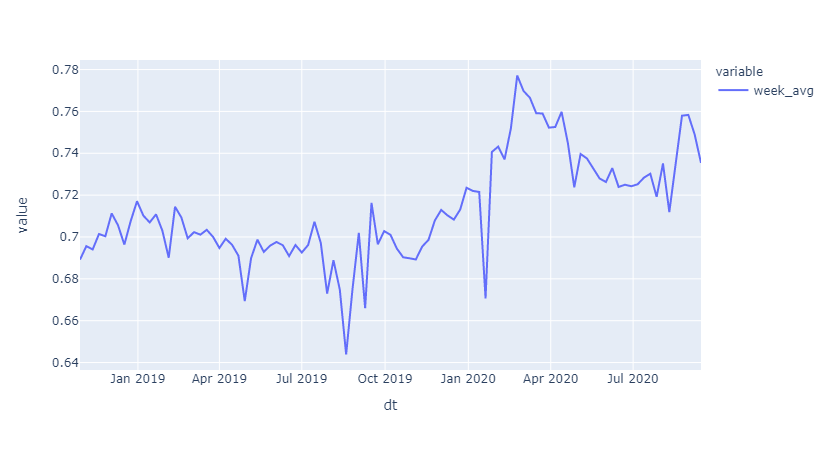

In [24]:
import pandas as pd 
pd.options.plotting.backend = 'plotly'

home_weekly[['dt', 'week_avg']].groupby('dt').sum().plot()